In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 62.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 74.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.0/266.0 KB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 105.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 79.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 KB 44.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━

In [3]:
import pandas as pd
import numpy as np

In [4]:
df1 = pd.read_csv('/content/drive/MyDrive/499A_Project/IMDB/IMDB_train_4000.csv',index_col=False, encoding='iso-8859-1', 
                                warn_bad_lines=True, error_bad_lines=False)

df2 = pd.read_csv('/content/drive/MyDrive/499A_Project/IMDB/IMDB_test_1000.csv',index_col=False, encoding='iso-8859-1', 
                                warn_bad_lines=True, error_bad_lines=False)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
print(df1.head())

                                                text  label
0  I think this still is the best routine. There ...      1
1  As far as parody films go, there are few that ...      1
2  "Panic in the Streets" is a fairly unknown lit...      1
3  "How To Lose Friends & Alienate People" is not...      1
4  I saw this film last night on cable and it is ...      1


In [6]:
print(df2.head())

                                                text  label
0  I love this movie. My only disappointment was ...      1
1  I saw this as a child in the late eighties and...      1
2  Daniel Day Lewis is one of the best actors of ...      1
3  I loved this exiting republic serial! The stor...      1
4  I was 5 years old when I saw this musical movi...      1


In [7]:
df1.label[df1.label == 1]="TRUE"
df1.label[df1.label == 0]="FALSE"

df2.label[df2.label == 1]="TRUE"
df2.label[df2.label == 0]="FALSE"

<ipython-input-7-af82ade73374>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.label[df1.label == 1]="TRUE"
<ipython-input-7-af82ade73374>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.label[df2.label == 1]="TRUE"


In [8]:
# taking acceptable and deleting unacceptable
df3 = df1[~df1.label.str.contains('TRUE')]
df3 = df3.sample(n=2000, replace=True)
df3["label"].value_counts()

FALSE    2000
Name: label, dtype: int64

In [9]:
# taking acceptable and deleting unacceptable
df4 = df1[~df1.label.str.contains('FALSE')]
df4 = df4.sample(n=2000, replace=True)
df4["label"].value_counts()

TRUE    2000
Name: label, dtype: int64

In [10]:
frames = [df3, df4]

temp = pd.concat(frames)

In [11]:
temp["label"].value_counts()

FALSE    2000
TRUE     2000
Name: label, dtype: int64

In [12]:
# taking acceptable and deleting unacceptable
df5 = df2[~df2.label.str.contains('TRUE')]
df5 = df5.sample(n=500, replace=True)
df5["label"].value_counts()

FALSE    500
Name: label, dtype: int64

In [13]:
# taking acceptable and deleting unacceptable
df6 = df2[~df2.label.str.contains('FALSE')]
df6 = df6.sample(n=500, replace=True)
df6["label"].value_counts()

TRUE    500
Name: label, dtype: int64

In [14]:
frames2 = [df5, df6]

temp2 = pd.concat(frames2)

In [15]:
temp2["label"].value_counts()

FALSE    500
TRUE     500
Name: label, dtype: int64

In [16]:
frames3 = [df3, df4, df5, df6]

temp3 = pd.concat(frames3)

In [17]:
temp3["label"].value_counts()

FALSE    2500
TRUE     2500
Name: label, dtype: int64

In [18]:
text1 = temp3['text']+temp3['text']
emotion= temp3['label'].tolist()
text=text1.values.tolist()

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text , emotion, test_size=.2, random_state=42)

In [20]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

4000
4000
1000
1000


In [21]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
import ktrain
from ktrain import text
MODEL_NAME = 'bert-base-cased'
t = text.Transformer(MODEL_NAME, maxlen=500)

In [23]:
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

preprocessing train...
language: en
train sequence lengths:
	mean : 477
	95percentile : 1231
	99percentile : 1901


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 452
	95percentile : 1170
	99percentile : 1631


In [24]:
model = t.get_classifier()

In [25]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=6)

simulating training for different learning rates... this may take a few moments...
666/666 [==============================] - 447s 635ms/step - loss: 7.6458 - accuracy: 0.5187


done.
Visually inspect loss plot and select learning rate associated with falling loss


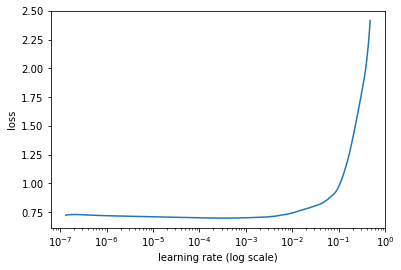

In [26]:
learner.lr_find(show_plot=True, max_epochs=1)

In [ ]:
history = learner.fit_onecycle(2e-5, 20)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/20
667/667 [==============================] - 550s 823ms/step - loss: 0.4293 - accuracy: 0.8158 - val_loss: 0.2337 - val_accuracy: 0.9250
Epoch 2/20
667/667 [==============================] - 548s 821ms/step - loss: 0.1917 - accuracy: 0.9362 - val_loss: 0.1930 - val_accuracy: 0.9400
Epoch 3/20
667/667 [==============================] - 546s 818ms/step - loss: 0.1111 - accuracy: 0.9680 - val_loss: 0.1911 - val_accuracy: 0.9330
Epoch 4/20
667/667 [==============================] - 546s 818ms/step - loss: 0.0580 - accuracy: 0.9827 - val_loss: 0.2210 - val_accuracy: 0.9490
Epoch 5/20
667/667 [==============================] - 546s 818ms/step - loss: 0.0424 - accuracy: 0.9880 - val_loss: 0.1807 - val_accuracy: 0.9530
Epoch 6/20
515/667 [======================>.......] - ETA: 1:55 - loss: 0.0411 - accuracy: 0.9874

In [ ]:
class_names=["TRUE","FALSE"]

In [ ]:
learner.validate(val_data=(val), class_names=class_names)

In [ ]:
learner.lr_find(show_plot=True, max_epochs=1)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:

def PlotGraph(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'g', label='Training acc')
    plt.plot(x, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'g', label='Training loss')
    plt.plot(x, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend() 

In [ ]:
PlotGraph(history)

In [ ]:
learner.plot('loss')